In [1]:
import pandas as pd
from constants import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fname = "data/ev_sales/BEV-PHEV-HEV-FCEV Sales By State for 2011-2021-EVAdoption.xlsx"
sample_df = pd.read_excel(fname, sheet_name = '2013')

In [3]:
# start_year = 2011
# end_year = 2019
# new_cols = [" ".join(i.split()[1:]) if len(i.split()) > 1 else i for i in sample_df.columns  ]
# df = pd.DataFrame(columns=new_cols)
# for year in range(start_year, end_year):
#     t_df = pd.read_excel(fname, sheet_name="{}".format(year))
#     t_df.columns = new_cols
#     t_df['year'] = str(year)
#     df = df.append(t_df)
    
start_year = 2013
end_year = 2022
read_cols = ["State", "FCEV Sales", "BEV Sales", 'BEV Market Share', "PHEV Sales"]
df = pd.DataFrame(columns=read_cols)
for year in range(start_year, end_year):
    filter_cols = ["{} {}".format(year, j) if i>0 else j for i, j in enumerate(read_cols)]
    t_df = pd.read_excel(fname, sheet_name="{}".format(year), usecols=filter_cols)
    t_df.columns = read_cols
    t_df['year'] = str(year)
    df = df.append(t_df)

C:\Users\harsh\AppData\Local\Temp\ipykernel_4812\1636989517.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(t_df)
C:\Users\harsh\AppData\Local\Temp\ipykernel_4812\1636989517.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(t_df)
C:\Users\harsh\AppData\Local\Temp\ipykernel_4812\1636989517.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(t_df)
C:\Users\harsh\AppData\Local\Temp\ipykernel_4812\1636989517.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(t_df)
C:\Users\harsh\AppData\Local\Temp\ipykernel_4812\1636989517.py:20: FutureWarning: The frame.append method is

In [4]:
df

,State,FCEV Sales,BEV Sales,BEV Market Share,PHEV Sales,year
0,Alabama,0,77,0.0004,99,2013
1,Alaska,0,17,0.0007,26,2013
2,Arizona,0,705,0.0023,544,2013
3,Arkansas,0,24,0.0002,74,2013
4,California,19,20943,0.0129,17512,2013
...,...,...,...,...,...,...
47,Washington,0,17143,0.0696,3637,2021
48,West Virginia,0,390,0.0058,279,2021
49,Wisconsin,0,3011,0.0147,1336,2021
50,Wyoming,0,138,0.0076,128,2021


In [5]:
df['ev_sales'] =  df["FCEV Sales"] + df["BEV Sales"] +  df["PHEV Sales"] 
df['total'] = (df['BEV Sales'])/df['BEV Market Share'] 
df['nonev_sales'] = df['total'] - df['ev_sales']

In [6]:
combined_ev_sales_df = df.groupby(['State'])[["FCEV Sales", "BEV Sales", "PHEV Sales", "nonev_sales"]].sum().reset_index()

In [7]:
combined_ev_sales_df['State'] = combined_ev_sales_df['State'].replace("District of Columbia", "District Of Columbia")

In [8]:
epa_region = pd.read_csv("data/states_and_counties.csv")
epa_region = epa_region[['State Name','State Code', "EPA Region"]]
epa_region = epa_region[epa_region['State Code'] != 'CC']
epa_region['State Code'] = epa_region['State Code'].apply(int)
epa_region = epa_region.drop_duplicates(['State Code'], keep='first')
mdf = combined_ev_sales_df.merge(epa_region, left_on="State", right_on="State Name", how='left')

In [9]:
mdf

,State,FCEV Sales,BEV Sales,PHEV Sales,nonev_sales,State Name,State Code,EPA Region
0,Alabama,0,4166,2413,1.747582e+06,Alabama,1.0,4.0
1,Alaska,0,697,452,2.158426e+05,Alaska,2.0,10.0
2,Arizona,0,35628,10723,2.857543e+06,Arizona,4.0,9.0
3,Arkansas,1,2082,1310,1.130052e+06,Arkansas,5.0,6.0
4,California,10594,623801,342547,1.525987e+07,California,6.0,9.0
5,Colorado,0,37343,14491,2.204394e+06,Colorado,8.0,8.0
6,Connecticut,1,14359,10453,1.433621e+06,Connecticut,9.0,1.0
7,Delaware,0,3031,2050,4.183860e+05,Delaware,10.0,3.0
8,District Of Columbia,0,3985,2555,2.154954e+05,District Of Columbia,11.0,3.0
9,Florida,2,92277,28157,1.087393e+07,Florida,12.0,4.0


In [10]:
# mdf['ev_sales'] = mdf["FCEV Sales"] + mdf["BEV Sales"] +  mdf["PHEV Sales"] + mdf["HEV Sales"]
mdf['ev_sales'] =  mdf["FCEV Sales"] + mdf["BEV Sales"] +  mdf["PHEV Sales"] 

In [11]:
mdf

,State,FCEV Sales,BEV Sales,PHEV Sales,nonev_sales,State Name,State Code,EPA Region,ev_sales
0,Alabama,0,4166,2413,1.747582e+06,Alabama,1.0,4.0,6579
1,Alaska,0,697,452,2.158426e+05,Alaska,2.0,10.0,1149
2,Arizona,0,35628,10723,2.857543e+06,Arizona,4.0,9.0,46351
3,Arkansas,1,2082,1310,1.130052e+06,Arkansas,5.0,6.0,3393
4,California,10594,623801,342547,1.525987e+07,California,6.0,9.0,976942
5,Colorado,0,37343,14491,2.204394e+06,Colorado,8.0,8.0,51834
6,Connecticut,1,14359,10453,1.433621e+06,Connecticut,9.0,1.0,24813
7,Delaware,0,3031,2050,4.183860e+05,Delaware,10.0,3.0,5081
8,District Of Columbia,0,3985,2555,2.154954e+05,District Of Columbia,11.0,3.0,6540
9,Florida,2,92277,28157,1.087393e+07,Florida,12.0,4.0,120436


In [12]:
total_us_ev_sales = mdf[mdf['State'] == 'Total US']['ev_sales'].tolist()[0]
mdf['us_percent'] = (mdf['ev_sales']*100)/total_us_ev_sales

In [13]:
mdf

,State,FCEV Sales,BEV Sales,PHEV Sales,nonev_sales,State Name,State Code,EPA Region,ev_sales,us_percent
0,Alabama,0,4166,2413,1.747582e+06,Alabama,1.0,4.0,6579,0.288854
1,Alaska,0,697,452,2.158426e+05,Alaska,2.0,10.0,1149,0.050447
2,Arizona,0,35628,10723,2.857543e+06,Arizona,4.0,9.0,46351,2.035063
3,Arkansas,1,2082,1310,1.130052e+06,Arkansas,5.0,6.0,3393,0.148971
4,California,10594,623801,342547,1.525987e+07,California,6.0,9.0,976942,42.893108
5,Colorado,0,37343,14491,2.204394e+06,Colorado,8.0,8.0,51834,2.275797
6,Connecticut,1,14359,10453,1.433621e+06,Connecticut,9.0,1.0,24813,1.089427
7,Delaware,0,3031,2050,4.183860e+05,Delaware,10.0,3.0,5081,0.223084
8,District Of Columbia,0,3985,2555,2.154954e+05,District Of Columbia,11.0,3.0,6540,0.287142
9,Florida,2,92277,28157,1.087393e+07,Florida,12.0,4.0,120436,5.287800


In [14]:
mdf = mdf[~mdf['State Code'].isin(EXCLUDE_STATES)]
mdf_carb = mdf[mdf['State Code'].isin(ZEV_STATES)]
mdf_noncarb = mdf[~mdf['State Code'].isin(ZEV_STATES)]
mdf_noncarb = mdf_noncarb[mdf_noncarb['State']!='Total US']

In [15]:
mdf_carb['us_percent'].sum(), mdf_noncarb['us_percent'].sum()

(59.34743284656791, 40.65247934247153)

In [16]:
# mdf_carb.to_csv("{}/{}_{}_{}.csv".format(OUTPUT_FILE, "carb_df_zev_sales", start_year, end_year), index=False)
# mdf_noncarb.to_csv("{}/{}_{}_{}.csv".format(OUTPUT_FILE, "noncarb_df_zev_sales", start_year, end_year), index=False)

mdf_carb.to_csv("{}/{}_{}_{}.csv".format(OUTPUT_FILE, "carb_df_nonev_sales", start_year, end_year), index=False)
mdf_noncarb.to_csv("{}/{}_{}_{}.csv".format(OUTPUT_FILE, "noncarb_df_nonev_sales", start_year, end_year), index=False)

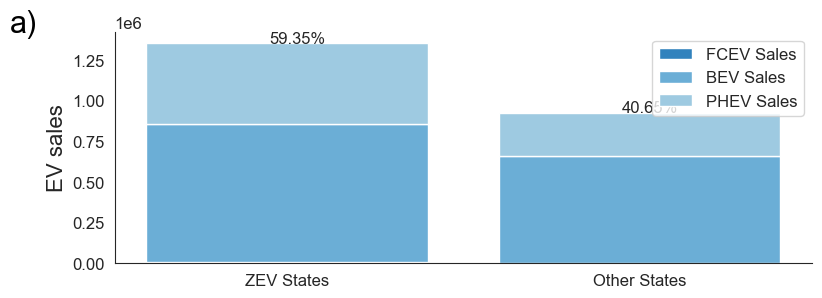

In [17]:
plt.rcParams.update({'font.size': 12})

sns.set_style('white')
cmap = plt.get_cmap('tab20c')

fig, ax = plt.subplots(figsize=(9,3))
ax.text(-0.15, 1, "a)", transform=ax.transAxes, size=22, color='black')

label = ['ZEV States', 'Other States']
fcev_sales = [mdf_carb['FCEV Sales'].sum(), mdf_noncarb['FCEV Sales'].sum()]
bev_sales = [mdf_carb['BEV Sales'].sum(), mdf_noncarb['BEV Sales'].sum()]
phev_sales = [mdf_carb['PHEV Sales'].sum(), mdf_noncarb['PHEV Sales'].sum()]
y1 = fcev_sales[0] + bev_sales[0] + phev_sales[0]
y2 = fcev_sales[1] + bev_sales[1] + phev_sales[1]

ax.text(-0.05, y1, "{:.2f}%".format(mdf_carb['us_percent'].sum())) 
ax.text(0.95, y2, "{:.2f}%".format(mdf_noncarb['us_percent'].sum())) 

plt.bar(label, fcev_sales, label = 'FCEV Sales', color = cmap(0))
plt.bar(label, bev_sales, bottom = fcev_sales, label = 'BEV Sales', color = cmap(1))
plt.bar(label, phev_sales, bottom = [i+j for i, j in zip(fcev_sales, bev_sales)], label='PHEV Sales', color = cmap(2))
plt.legend(loc='upper right')
plt.ylabel("EV sales", size=16)
sns.despine()
plt.savefig("{}/{}.png".format(OUTPUT_IMAGE, "zev_sales_a"), bbox_inches='tight')
plt.show()

In [18]:
epa_region[epa_region['State Code'].isin(EXCLUDE_STATES)]

,State Name,State Code,EPA Region


In [19]:
epa_region[epa_region['State Name'] == 'Minnesota']

,State Name,State Code,EPA Region
1322,Minnesota,27,5


In [20]:
mdf_carb

,State,FCEV Sales,BEV Sales,PHEV Sales,nonev_sales,State Name,State Code,EPA Region,ev_sales,us_percent
4,California,10594,623801,342547,1.525987e+07,California,6.0,9.0,976942,42.893108
6,Connecticut,1,14359,10453,1.433621e+06,Connecticut,9.0,1.0,24813,1.089427
19,Maine,1,2693,4080,5.369123e+05,Maine,23.0,1.0,6774,0.297416
20,Maryland,4,27846,16067,2.611214e+06,Maryland,24.0,3.0,43917,1.928197
21,Massachusetts,1,32014,22803,2.908881e+06,Massachusetts,25.0,1.0,54818,2.406811
30,New Jersey,2,50257,23555,4.776901e+06,New Jersey,34.0,2.0,73814,3.240839
32,New York,2,57399,54632,8.425623e+06,New York,36.0,2.0,112033,4.918863
37,Oregon,0,30586,15637,1.336184e+06,Oregon,41.0,10.0,46223,2.029443
39,Rhode Island,0,2492,2465,4.197690e+05,Rhode Island,44.0,1.0,4957,0.217639
46,Vermont,0,3501,3917,3.467703e+05,Vermont,50.0,1.0,7418,0.325691
